In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


# Reading Data

In [22]:
heart_disease <- read_csv("processed.cleveland.data", col_names = FALSE)
colnames(heart_disease) <- c("age", "sex", "cp", "testbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
# heart_disease <- mutate(heart_disease, sex = as.factor(sex), cp =as.factor(cp), fbs =as.factor(fbs), restecg = as.factor(restecg), exang = as.factor(exang), slope = as.factor(slope), num = as.factor(num)) |>
#                 mutate(sex = fct_recode(sex, "M" = "1", "F" = "0"))
heart_disease

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


# Cleaning and Wrangling Data

Since my interest is in making a prediction of the diagnosis of heart disease from cholestoral and maximum heart rate achieved and I am also interested in finding out if there is a relationship between thalach and chol for people above 45 years of age

In [23]:
heart_disease <- filter(heart_disease, age > 35) |>
                select(age, sex, chol, thalach, testbps, num, fbs, ca) |>
                mutate(sex = as_factor(sex), num = as_factor(num))|>
                mutate(sex = fct_recode(sex, "M" = "1", "F" = "0"))
heart_disease

age,sex,chol,thalach,testbps,num,fbs,ca
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>
63,M,233,150,145,0,1,0.0
67,M,286,108,160,2,0,3.0
67,M,229,129,120,1,0,2.0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,M,131,115,130,3,0,1.0
57,F,236,174,130,1,0,1.0
38,M,175,173,138,0,0,?


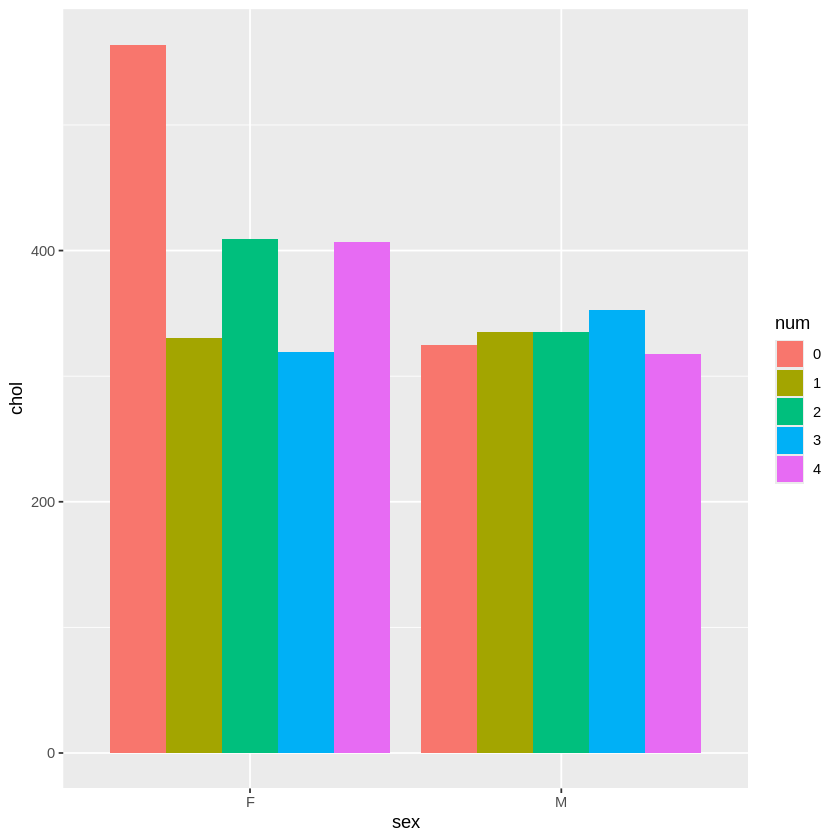

In [31]:
ggplot(heart_disease, aes(x=sex, y = chol, fill = num)) +
 geom_bar(stat= "identity", position = "dodge")